# Quantum-HSE-Burgers-Solver
|||
|-|-|
|**Authors:** |Fataneh Bakherad & Mehrdad Ghanbari Mobarakeh|
|**Date:** |August 8, 2025|
|**Version:** |**1.00**<br/>*Details see at the end of this notebook*|
|**References:**|
[Project 3 Quantum Algorithm as a PDE Solver for Computational Fluid Dynamics (CFD)](https://www.thewiser.org/quantum-pde-solvers-for-cfd)
<br/>

## Import libraries

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

from HSE import *

## Run simulation

In [2]:
# Number of qubits to discretize the position space.
n_qubits = 4

# Number of discrete time steps for the simulation.
n_steps = 50

# Total simulation time.
t_max = 0.5

noise_model = NoiseModel.from_backend(FakeSherbrooke())
noisy_backend = AerSimulator(method='statevector', noise_model=noise_model)

noiseless_backend = AerSimulator(method='statevector')
service = QiskitRuntimeService()

all_reference_states, _, _ = run_iterative_simulation(n_qubits, n_steps, t_max, noiseless_backend, service)
noisy_states, noisy_max_Q, noisy_norms = run_iterative_simulation(n_qubits, n_steps, t_max, noisy_backend, service)


--- Starting Iterative Hybrid Simulation ---
[step 1/50] t=0.0100 norm=1.000000 max|Q|=3.1032e-01
[step 2/50] t=0.0200 norm=1.000000 max|Q|=3.6034e-01
[step 3/50] t=0.0300 norm=1.000000 max|Q|=3.6405e-01
[step 4/50] t=0.0400 norm=1.000000 max|Q|=3.0362e-01
[step 5/50] t=0.0500 norm=1.000000 max|Q|=3.8048e-01
[step 6/50] t=0.0600 norm=1.000000 max|Q|=3.1637e-01
[step 7/50] t=0.0700 norm=1.000000 max|Q|=3.4718e-01
[step 8/50] t=0.0800 norm=1.000000 max|Q|=3.6430e-01
[step 9/50] t=0.0900 norm=1.000000 max|Q|=2.9618e-01
[step 10/50] t=0.1000 norm=1.000000 max|Q|=3.7305e-01
[step 11/50] t=0.1100 norm=1.000000 max|Q|=3.0080e-01
[step 12/50] t=0.1200 norm=1.000000 max|Q|=3.5798e-01
[step 13/50] t=0.1300 norm=1.000000 max|Q|=3.4787e-01
[step 14/50] t=0.1400 norm=1.000000 max|Q|=3.1951e-01
[step 15/50] t=0.1500 norm=1.000000 max|Q|=3.7523e-01
[step 16/50] t=0.1600 norm=1.000000 max|Q|=2.9325e-01
[step 17/50] t=0.1700 norm=1.000000 max|Q|=3.7367e-01
[step 18/50] t=0.1800 norm=1.000000 max|Q|=3.4

## Display final results

In [3]:
times = np.linspace(0, t_max, n_steps + 1)
    
# Calculate L2 error by comparing noisy states to noiseless reference states
L2_errors = [np.linalg.norm(noisy_states[i] - all_reference_states[i]) for i in range(len(noisy_states))]

results_df = pd.DataFrame({
    'time': times,
    'L2_error_u': L2_errors,
    'max_Q': noisy_max_Q,
    'norm': noisy_norms
})
    
print("\n--- Final Results ---")
print(results_df)


--- Final Results ---
    time  L2_error_u     max_Q  norm
0   0.00    0.000000  0.376525   1.0
1   0.01    0.001436  0.310593   1.0
2   0.02    0.002025  0.360453   1.0
3   0.03    0.001771  0.364189   1.0
4   0.04    0.002243  0.303946   1.0
5   0.05    0.003184  0.381304   1.0
6   0.06    0.003488  0.316357   1.0
7   0.07    0.003804  0.348169   1.0
8   0.08    0.004580  0.365428   1.0
9   0.09    0.005156  0.296544   1.0
10  0.10    0.875121  0.466475   1.0
11  0.11    0.882528  0.342135   1.0
12  0.12    0.886777  0.482640   1.0
13  0.13    0.888397  0.364704   1.0
14  0.14    0.886707  0.479374   1.0
15  0.15    0.886205  0.390224   1.0
16  0.16    1.293106  0.349576   1.0
17  0.17    1.300966  0.363218   1.0
18  0.18    1.290518  0.401394   1.0
19  0.19    1.299932  0.385882   1.0
20  0.20    1.304840  0.433365   1.0
21  0.21    1.293265  0.410063   1.0
22  0.22    1.302288  0.479332   1.0
23  0.23    1.303184  0.438830   1.0
24  0.24    1.289930  0.506173   1.0
25  0.25    1.2

## Plot 1: L2 Error over time

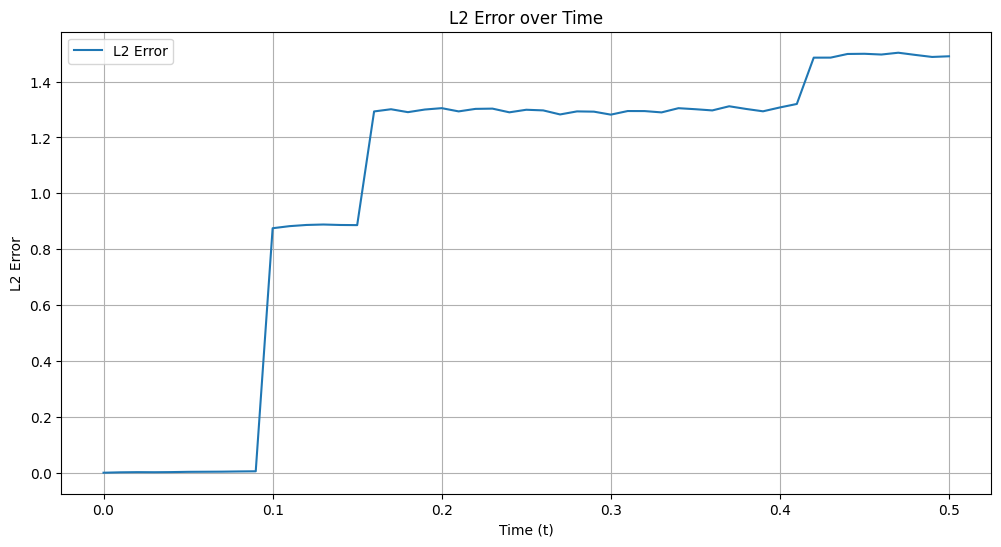

In [4]:
# Plot 1: L2 Error over time
plt.figure(figsize=(12, 6))
plt.plot(results_df['time'], results_df['L2_error_u'], label='L2 Error')
plt.title("L2 Error over Time")
plt.xlabel("Time (t)")
plt.ylabel("L2 Error")
plt.legend()
plt.grid(True)
plt.show()

## Plot 2: Probability distribution of the final state

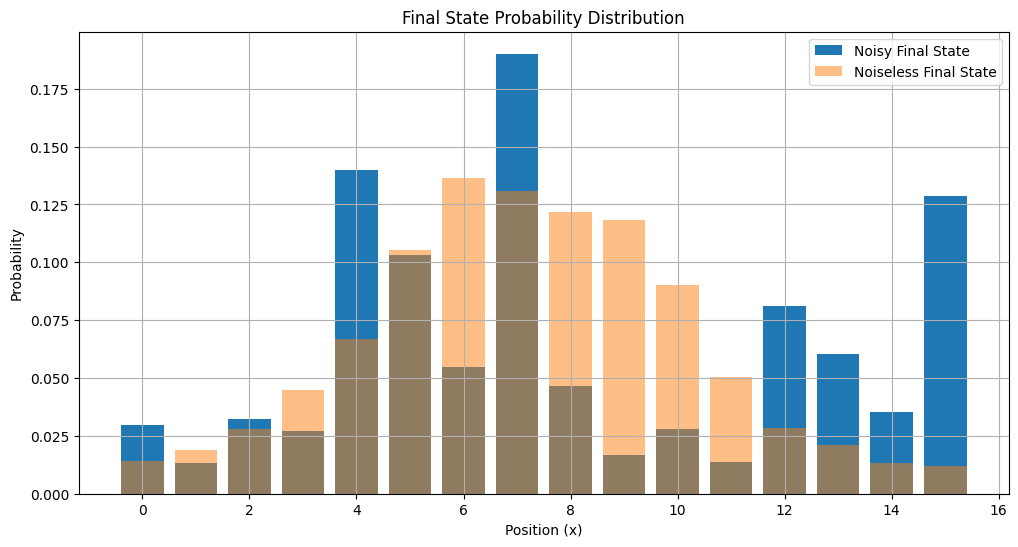

In [5]:
# Plot 2: Probability distribution of the final state
plt.figure(figsize=(12, 6))
x_vals = np.arange(2**n_qubits)
plt.bar(x_vals, np.abs(noisy_states[-1])**2, label='Noisy Final State')
plt.bar(x_vals, np.abs(all_reference_states[-1])**2, alpha=0.5, label='Noiseless Final State')
plt.title("Final State Probability Distribution")
plt.xlabel("Position (x)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

## Qiskit packages versions

In [6]:
import qiskit
import qiskit_ibm_runtime
import qiskit_aer

print(f'Qiskit: {qiskit.__version__}')
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')
print(f"Qiskit Aer version: {qiskit_aer.__version__}")

Qiskit: 2.1.1
Qiskit IBM Runtime: 0.40.1
Qiskit Aer version: 0.17.1
